밤하늘과 우주 혹은 관련 사물을 떠올리게 하는 곡
===
메인용

In [1]:
import librosa, librosa.display, librosa.feature
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import sklearn

## 1. 음원 파일 전처리 및 대표 음원 구간 생성

In [3]:
"""
sound = AudioSegment.from_mp3("mikrokosmos.mp3")
sound.export("mikrokosmos.wav", format="wav")
sound = AudioSegment.from_mp3("meteor.mp3")
sound.export("meteor.wav", format="wav")
sound = AudioSegment.from_mp3("magicshop.mp3")
sound.export("magicshop.wav", format="wav")
sound = AudioSegment.from_mp3("thefeeling.mp3")
sound.export("thefeeling.wav", format="wav")
sound = AudioSegment.from_mp3("askyfullofstars.mp3")
sound.export("askyfullofstars.wav", format="wav")
sound = AudioSegment.from_mp3("bluemoon_inst.mp3")
sound.export("bluemoon_inst.wav", format="wav")
sound = AudioSegment.from_mp3("heavenisaplace.mp3")
sound.export("heavenisaplace.wav", format="wav")
sound = AudioSegment.from_mp3("rewritethestars_inst.mp3")
sound.export("rewritethestars_inst.wav", format="wav")
"""

'\nsound = AudioSegment.from_mp3("mikrokosmos.mp3")\nsound.export("mikrokosmos.wav", format="wav")\nsound = AudioSegment.from_mp3("meteor.mp3")\nsound.export("meteor.wav", format="wav")\nsound = AudioSegment.from_mp3("magicshop.mp3")\nsound.export("magicshop.wav", format="wav")\nsound = AudioSegment.from_mp3("thefeeling.mp3")\nsound.export("thefeeling.wav", format="wav")\nsound = AudioSegment.from_mp3("askyfullofstars.mp3")\nsound.export("askyfullofstars.wav", format="wav")\nsound = AudioSegment.from_mp3("bluemoon_inst.mp3")\nsound.export("bluemoon_inst.wav", format="wav")\nsound = AudioSegment.from_mp3("heavenisaplace.mp3")\nsound.export("heavenisaplace.wav", format="wav")\nsound = AudioSegment.from_mp3("rewritethestars_inst.mp3")\nsound.export("rewritethestars_inst.wav", format="wav")\n'

In [2]:
mikro, sr = librosa.load('mikrokosmos.wav', sr=44100, offset=0.213, duration=4.081)
#얘도 inst 음원으로 바꾸기
magic, sr = librosa.load('magicshop.wav', sr=44100, offset=220.426, duration=5.841)
asfos, sr = librosa.load('askyfullofstars.wav', sr=44100, offset=7.741, duration=7.776)
blue, sr = librosa.load('bluemoon_inst.wav', sr=44100, offset =1.237, duration=17.881)
# offset=0.7, duration=9.538
# offset=10.069, duration=9.033
feel, sr = librosa.load('thefeeling.wav', sr=44100, offset=0.7, duration=9.538)
heaven, sr = librosa.load('heavenisaplace.wav', sr=44100, offset=40.837, duration=8.165)
rts, sr = librosa.load('rewritethestars_inst.wav', sr=44100, offset= 16.02, duration=7.728)
#librosa.display.waveplot(mikrokosmos, sr)

## 2. Feature Extraction
### **1) Spectral features**
#### (1) Mel Frequency Cepstral Coefficients(MFCC)

In [3]:
def vector_split(v, n_split):
    v=np.array(v)
    length=len(v)//n_split
    res=[]
    for i in range(n_split-1):
        res.append(v[i*length:(i+1)*length])
    res.append(v[(i+1)*length:])
    return np.array(res)

def split_mean(v, n_split):
    splitted_vector=vector_split(v, n_split)
    res=[]
    for i in splitted_vector:
        res.append(i.mean())
    return np.array(res)

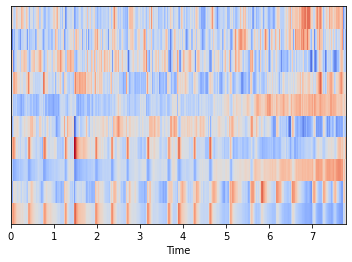

In [9]:
mfccs = librosa.feature.mfcc(asfos, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [8]:
mfccs = librosa.feature.mfcc(asfos, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-36.17459     -9.055868    13.414567     0.14971647  -4.5169296
  -5.948575    -9.043267    -6.422253    -3.0315704    2.4042604 ]


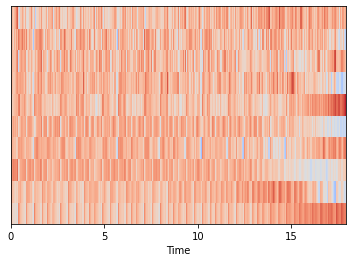

In [10]:
mfccs = librosa.feature.mfcc(blue, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [9]:
mfccs = librosa.feature.mfcc(blue, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-9.157669   29.6551      8.685628    2.7528353  -2.9933724   8.211896
 10.937923   -0.78747314 -0.05860563 -2.4324586 ]


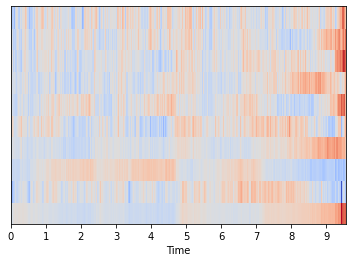

In [11]:
mfccs = librosa.feature.mfcc(feel, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [10]:
mfccs = librosa.feature.mfcc(feel, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-70.01013    16.386873   -8.819789  -23.055483  -20.208761   -5.3988585
 -10.856783  -19.222406  -10.790362   -3.731641 ]


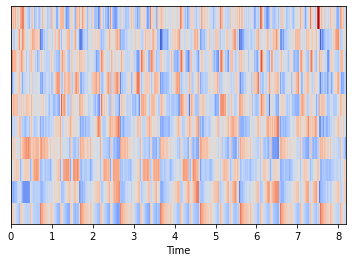

In [12]:
mfccs = librosa.feature.mfcc(heaven, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [11]:
mfccs = librosa.feature.mfcc(heaven, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-36.896763    19.983427     9.686364     4.2496605    1.3416187
  -2.3508003   -0.73086315  -1.8847454   -2.782086    -0.26235372]


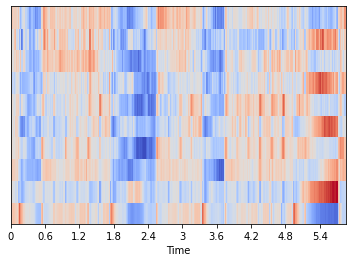

In [13]:
mfccs = librosa.feature.mfcc(magic, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [12]:
mfccs = librosa.feature.mfcc(magic, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[15.341789   13.91167     9.634583    3.1592581   1.8922002   4.75936
  1.9161733   0.94433373  1.7526667   3.8941324 ]


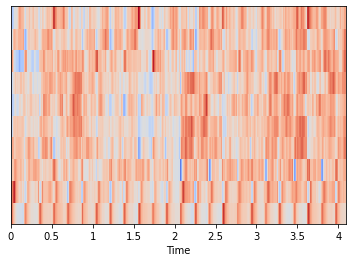

In [14]:
mfccs = librosa.feature.mfcc(mikro, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [14]:
mfccs = librosa.feature.mfcc(mikro, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-80.16248   24.692863 -10.152706  -6.593585 -11.422202 -16.904037
 -11.354086 -12.428134 -12.107736 -16.085793]


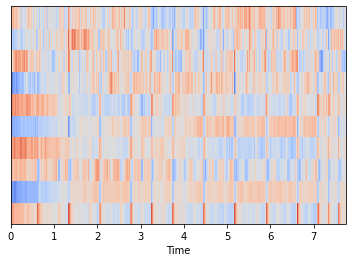

In [16]:
mfccs = librosa.feature.mfcc(rts, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [15]:
mfccs = librosa.feature.mfcc(rts, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-38.18392     5.395018   -0.4160908  -1.1770391   0.8475579  -2.9864862
  -2.4226668  -2.1937149   1.958965    4.2807355]


#### (2) Mel-scale spectrogram
사람의 가청 주파수인 8000Hz 이하의 주파수에 대해서만 scaling하여 spectrogram을 만드는 것.

[ 11.490963   -5.9235826 -15.161113  -22.271101  -25.835365  -27.83879
 -28.15775   -28.202478  -28.20337   -28.203373 ]


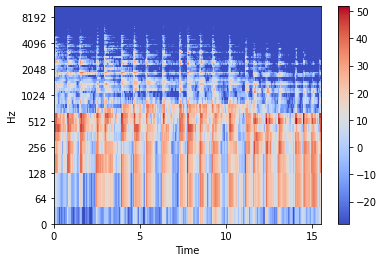

In [18]:
asfos_stft = np.abs(librosa.stft(asfos))
asfos_mel = librosa.feature.melspectrogram(S=asfos_stft**2)
new1 = librosa.amplitude_to_db(asfos_mel)
librosa.display.specshow(librosa.amplitude_to_db(asfos_mel), x_axis='time', y_axis='log')
plt.colorbar()
new1 = split_mean(new1, 10)
print(new1)


(128, 1541)
(10,)
[ 29.236862    2.2439616  -6.1740355 -11.70553   -11.252623  -13.092404
 -13.649908  -13.673389  -13.684605  -13.684778 ]


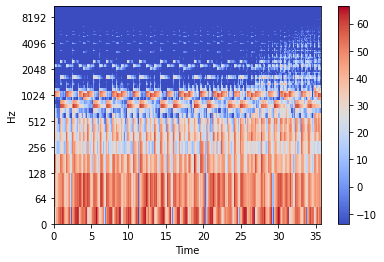

In [6]:
blue_stft = np.abs(librosa.stft(blue))
blue_mel = librosa.feature.melspectrogram(S=blue_stft**2)
new2 = librosa.amplitude_to_db(blue_mel)
librosa.display.specshow(librosa.amplitude_to_db(blue_mel), x_axis='time', y_axis='log')
plt.colorbar()
new2 = split_mean(new2, 10)
print(new2)

[9.20116, -5.3229647, -14.176193, -14.176282, -14.1391535, -14.305179, -14.494568, -14.497882, -14.524888, -14.532078]


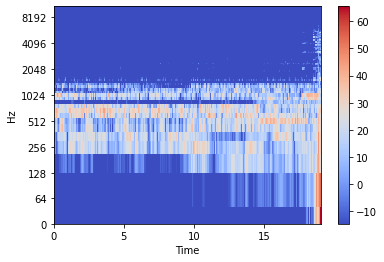

In [21]:
feel_stft = np.abs(librosa.stft(feel))
feeling_mel = librosa.feature.melspectrogram(S=feel_stft**2)
new3 = librosa.amplitude_to_db(feeling_mel)
librosa.display.specshow(librosa.amplitude_to_db(feeling_mel), x_axis='time', y_axis='log')
plt.colorbar()
new3 = split_mean(new3, 10)
print(list(new3))

[10.555779, -8.959397, -14.295384, -16.13446, -17.97293, -18.105404, -17.439543, -18.839045, -19.27605, -19.663313]


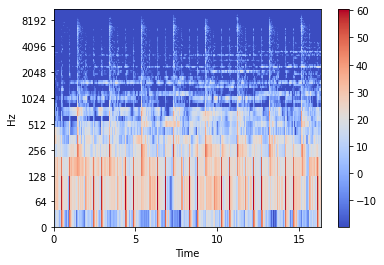

In [23]:
heaven_stft = np.abs(librosa.stft(heaven))
heaven_mel = librosa.feature.melspectrogram(S=heaven_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(heaven_mel), x_axis='time', y_axis='log')
plt.colorbar()

new4 = librosa.amplitude_to_db(heaven_mel)
new4 = split_mean(new4, 10)
print(list(new4))

[25.787735, 11.411772, 7.6422887, 3.9968674, 2.5074718, 1.7411057, 1.6168841, 1.6394088, 1.0837005, 0.6376016]


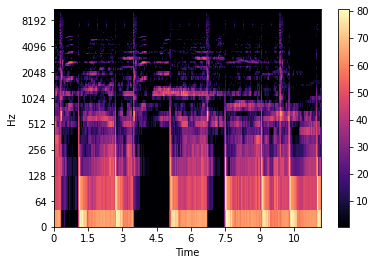

In [24]:
magic_stft = np.abs(librosa.stft(magic))
magic_mel = librosa.feature.melspectrogram(S=magic_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(magic_mel), x_axis='time', y_axis='log')
plt.colorbar()

new5 = librosa.amplitude_to_db(magic_mel)
new5 = split_mean(new5, 10)
print(list(new5))

[-2.2338848, -23.62939, -32.155643, -34.0103, -32.37177, -31.536818, -31.304317, -33.5271, -34.834442, -35.069397]


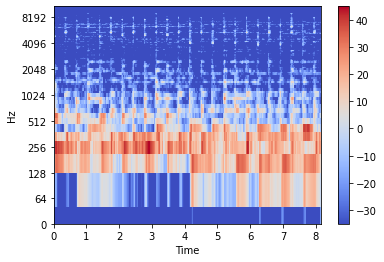

In [25]:
mikro_sftf = np.abs(librosa.stft(mikro))
mikro_mel = librosa.feature.melspectrogram(S=mikro_sftf**2)
librosa.display.specshow(librosa.amplitude_to_db(mikro_mel), x_axis='time', y_axis='log')
plt.colorbar()

new6 = librosa.amplitude_to_db(mikro_mel)
new6 = split_mean(new6, 10)
print(list(new6))

[9.190226, -10.025985, -24.32843, -27.218254, -29.05752, -29.87202, -30.024052, -30.045382, -30.045988, -30.045988]


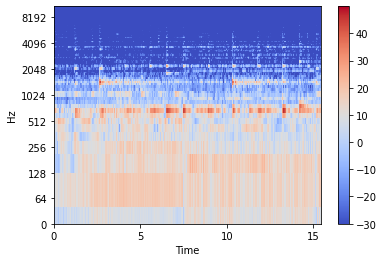

In [26]:
rts_stft = np.abs(librosa.stft(rts))
rts_mel = librosa.feature.melspectrogram(S=rts_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(rts_mel), x_axis='time', y_axis='log')
plt.colorbar()

new7 = librosa.amplitude_to_db(rts_mel)
new7 = split_mean(new7, 10)
print(list(new7))

#### (3) spectral centroid

In [13]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

0.3253931021796925


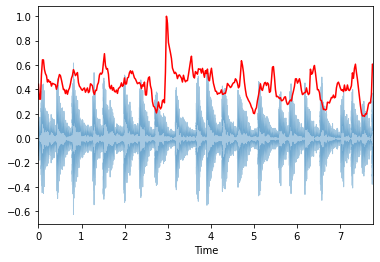

In [15]:
spectral_centroids = normalize(librosa.feature.spectral_centroid(asfos, sr=sr)[0])
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(spectral_centroids.mean())
 # normalize for visualization purposes
librosa.display.waveplot(asfos, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')

0.19056552624816894


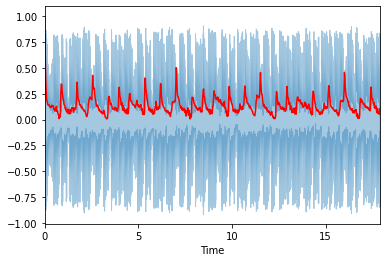

In [16]:
spectral_centroids = normalize(librosa.feature.spectral_centroid(blue, sr=sr)[0])
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(spectral_centroids.mean())
librosa.display.waveplot(blue, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')

0.09090063262863401


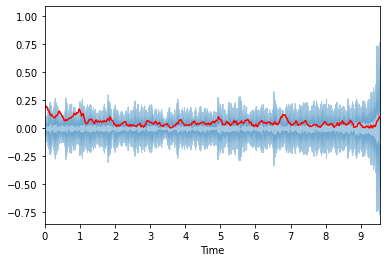

In [17]:
spectral_centroids = normalize(librosa.feature.spectral_centroid(feel, sr=sr)[0])
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(spectral_centroids.mean())
librosa.display.waveplot(feel, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')

0.31289116627462826


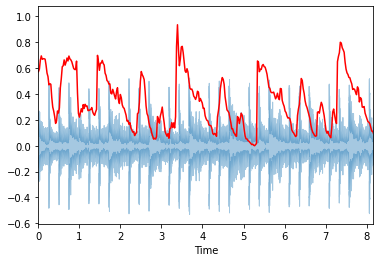

In [18]:
spectral_centroids = normalize(librosa.feature.spectral_centroid(heaven, sr=sr)[0])
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(spectral_centroids.mean())
librosa.display.waveplot(heaven, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')

0.5828411284165856


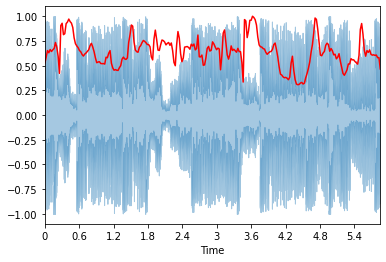

In [19]:
spectral_centroids = normalize(librosa.feature.spectral_centroid(magic, sr=sr)[0])
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(spectral_centroids.mean())
librosa.display.waveplot(magic, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')

0.4096537856152603


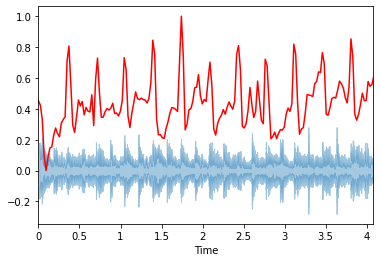

In [20]:
spectral_centroids = normalize(librosa.feature.spectral_centroid(mikro, sr=sr)[0])
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(spectral_centroids.mean())
librosa.display.waveplot(mikro, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')

0.18775396029304345


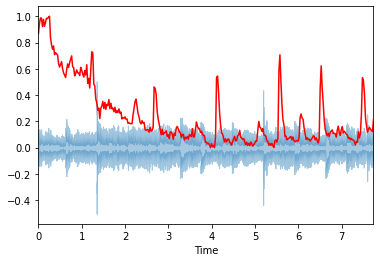

In [21]:
spectral_centroids = normalize(librosa.feature.spectral_centroid(rts, sr=sr)[0])
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(spectral_centroids.mean())
librosa.display.waveplot(rts, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')

#### (4) spectral contrast

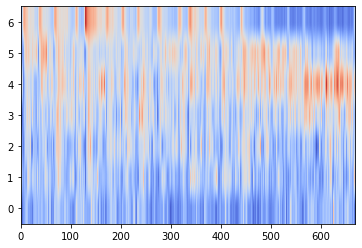

In [22]:
spectral_contrast = librosa.feature.spectral_contrast(asfos, sr=sr)
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')

#### (5) spectral roll-off

In [23]:
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(asfos+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(blue+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(feel+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(heaven+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(magic+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(mikro+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(rts+0.01, sr=sr)[0])
print(spectral_rolloff.mean())

0.34605543710021325
0.13381930415521104
0.08672034375021179
0.40977911381254406
0.6090094669640124
0.49913076662143824
0.19716359469009645


### 2) Tempo Features(Tempogram)
#### (1) Novelty Function

In [9]:
hop_length = 200 # samples per frame
# !!!"n0,1 수정"!!!
n0 = 100
n1 = 500

Text(0.5, 1.0, 'Novelty Function')

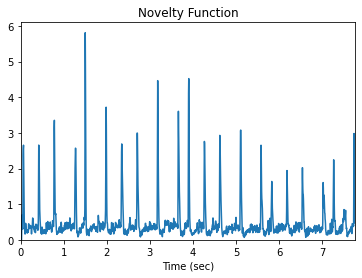

In [10]:
asfos_onset_env = librosa.onset.onset_strength(asfos, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(asfos_onset_env))
asfos_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(asfos_t, asfos_onset_env)
plt.xlim(0, asfos_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

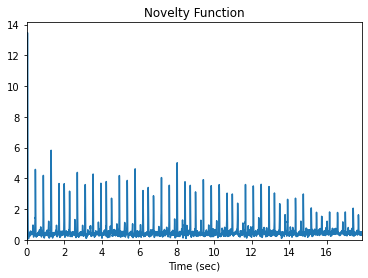

In [36]:
blue_onset_env = librosa.onset.onset_strength(blue, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(blue_onset_env))
blue_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(blue_t, blue_onset_env)
plt.xlim(0,blue_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

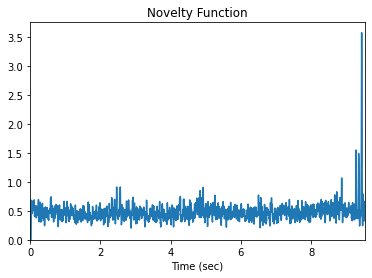

In [38]:
feel_onset_env = librosa.onset.onset_strength(feel, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(feel_onset_env))
feel_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(feel_t, feel_onset_env)
plt.xlim(0, feel_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

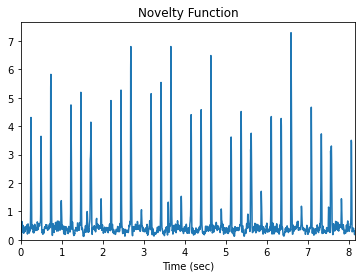

In [27]:
heaven_onset_env = librosa.onset.onset_strength(heaven, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(heaven_onset_env))
heaven_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(heaven_t, heaven_onset_env)
plt.xlim(0, heaven_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

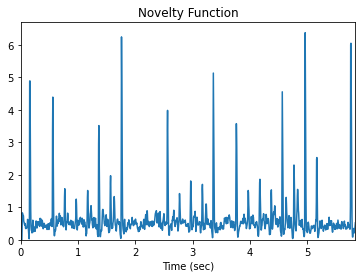

In [39]:
magic_onset_env = librosa.onset.onset_strength(magic, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(magic_onset_env))
magic_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(magic_t, magic_onset_env)
plt.xlim(0, magic_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

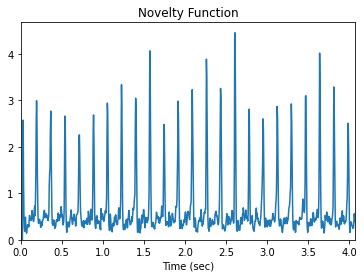

In [40]:
mikro_onset_env = librosa.onset.onset_strength(mikro, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(mikro_onset_env))
mikro_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(mikro_t, mikro_onset_env)
plt.xlim(0, mikro_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

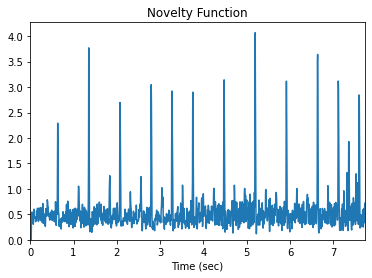

In [28]:
rts_onset_env = librosa.onset.onset_strength(rts, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(rts_onset_env))
rts_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(rts_t, rts_onset_env)
plt.xlim(0, rts_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

#### (2) Fourier Tempogram

(257, 1716)
0.039553218


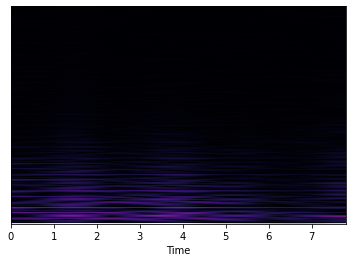

In [19]:
S = librosa.stft(asfos_onset_env, hop_length=1, n_fft=512)
asfos_fourier_tempogram = np.absolute(S)
librosa.display.specshow(asfos_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
asfos_tempo = (normalize(asfos_fourier_tempogram)).mean()
print(asfos_fourier_tempogram.shape)
print(asfos_tempo)

(257, 3944)
0.035301056


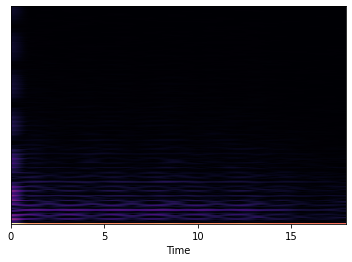

In [37]:
S = librosa.stft(blue_onset_env, hop_length=1, n_fft=512)
blue_fourier_tempogram = np.absolute(S)
librosa.display.specshow(blue_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
blue_tempo = (normalize(blue_fourier_tempogram)).mean()
print(blue_fourier_tempogram.shape)
print(blue_tempo)

(257, 2105)
0.015463126


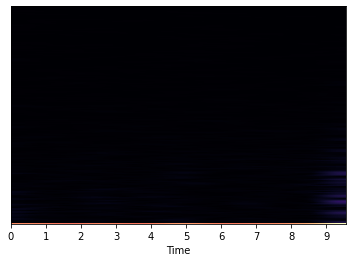

In [41]:
S = librosa.stft(feel_onset_env, hop_length=1, n_fft=512)
feel_fourier_tempogram = np.absolute(S)
librosa.display.specshow(feel_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
feel_tempo = (normalize(feel_fourier_tempogram)).mean()
print(feel_fourier_tempogram.shape)
print(feel_tempo)

(257, 1802)
0.049344562


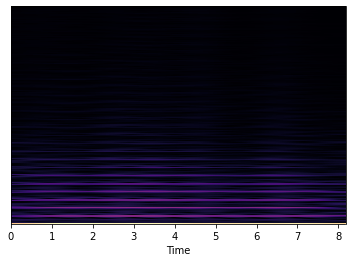

In [31]:
S = librosa.stft(heaven_onset_env, hop_length=1, n_fft=512)
heaven_fourier_tempogram = np.absolute(S)
librosa.display.specshow(heaven_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
heaven_tempo = (normalize(heaven_fourier_tempogram)).mean()
print(heaven_fourier_tempogram.shape)
print(heaven_tempo)

(257, 1289)
0.04174923


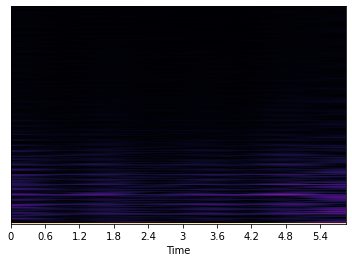

In [42]:
S = librosa.stft(magic_onset_env, hop_length=1, n_fft=512)
magic_fourier_tempogram = np.absolute(S)
librosa.display.specshow(magic_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
magic_tempo = (normalize(magic_fourier_tempogram)).mean()
print(magic_fourier_tempogram.shape)
print(magic_tempo)

(257, 901)
0.030729255


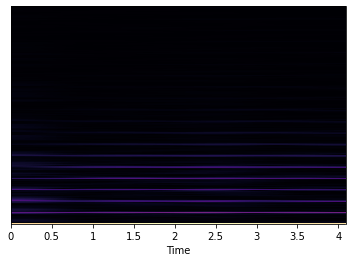

In [43]:
S = librosa.stft(mikro_onset_env, hop_length=1, n_fft=512)
mikro_fourier_tempogram = np.absolute(S)
librosa.display.specshow(mikro_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
mikro_tempo = (normalize(mikro_fourier_tempogram)).mean()
print(mikro_fourier_tempogram.shape)
print(mikro_tempo)

(257, 1706)
0.029626196


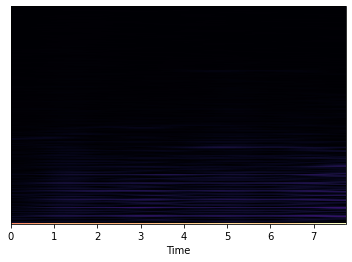

In [32]:
S = librosa.stft(rts_onset_env, hop_length=1, n_fft=512)
rts_fourier_tempogram = np.absolute(S)
librosa.display.specshow(rts_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
rts_tempo = (normalize(rts_fourier_tempogram)).mean()
print(rts_fourier_tempogram.shape)
print(rts_tempo)

In [33]:
asfos_tempo = librosa.beat.tempo(asfos, sr=sr)
print(asfos_tempo)
blue_tempo = librosa.beat.tempo(blue, sr=sr)
print(blue_tempo)
feel_tempo = librosa.beat.tempo(feel, sr=sr)
print(feel_tempo)
heaven_tempo = librosa.beat.tempo(heaven, sr=sr)
print(heaven_tempo)
magic_tempo = librosa.beat.tempo(magic, sr=sr)
print(magic_tempo)
mikro_tempo = librosa.beat.tempo(mikro, sr=sr)
print(mikro_tempo)
rts_tempo = librosa.beat.tempo(rts, sr=sr)
print(rts_tempo)

[126.04801829]
[143.5546875]
[123.046875]
[123.046875]
[151.99908088]
[114.84375]
[126.04801829]
